<h1> Titanic: Machine Learning from Disaster </h1>
<br>
This project has been created by <b> Maristela Carvalho de Jesus. </b>

<h1> Description and Goals </h1>

<br>
The sinking of the Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. 

<br>
The objective of this project is to apply the tools of machine learning to predict which passengers survived the tragedy. 

<h1> Importing libraries </h1>

In [4]:
# Import libraries necessary for this project
import pandas as pd
import numpy as np

#Visualization libraries
import seaborn as sb
import matplotlib.pyplot as plt

#Pretty display for notebooks
% matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Display markdown formatted output
from IPython.display import Markdown


#Machine Learning libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import f1_score, make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


<h1> Exploratory Data Analysis - EDA </h1>

In [5]:
# Read the Titanic dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

def bold (string):
    display (Markdown (string))
bold('**Preview of train data:**')

#preview the first 5 lines of train data
train.head (5)

**Preview of train data:**

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
bold('**Preview of test data:**')

#preview the first 5 lines of test data
test.head (5)

**Preview of test data:**

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<b> The Titanic dataset contains the following columns:</b>

<b> PassengerId: </b> The identifying number assigned to each passenger.
    
<b> Survived: </b> It's a flag that indicates if a passenger survived or died (0 = died, 1 = survived).
    
<b> Pclass: </b> It's the passenger class (1 = 1st class, 2 = 2nd class and 3 = 3rd class).
    
<b> Name: </b> The name of the passenger.
    
<b> Sex:</b> The gender of the passenger (i.e., Male or female).
 
<b> Age:</b> The age of the passenger in years.
 
<b> Sibsp:</b> It's the number of siblings/spouses aboard.
 
<b> Parch:</b> The number of parents/children aboard.
 
<b> Ticket:</b> The ticket number issued to the passenger.
 
<b> Fare:</b> The amount of money spent on their ticket.
 
<b>Cabin:</b> The cabin category occupied by the passenger.
 
<b> Embarked:</b> The port where the passenger embarked from (i.e., C = Cherbourg, Q = Queenstown, S = Southampton).


<b>Note:</b> In the test set there is no variable 'Survived'. In this project we will create the 'Survived' variable in the test set by learning from the train set.



<b> Predictions: </b>

Some groups of people were more likely to survive than others:


- Women are more likely to survive (We can confirm it by analysing the variable 'Sex')
- People traveling alone are more likely to survive (We can confirm it by analysing the variables 'SibSp' and 'Parch')
- Children are more likely to survive (We can confirm it by analysing the variable 'Age')
- The upper-class passengers are more likely to survive (We can confirm it by analysing the variable 'Pclass')



<h1> The first look into the data </h1>


Text(0.5,1,'Survival Rate by Embarked')

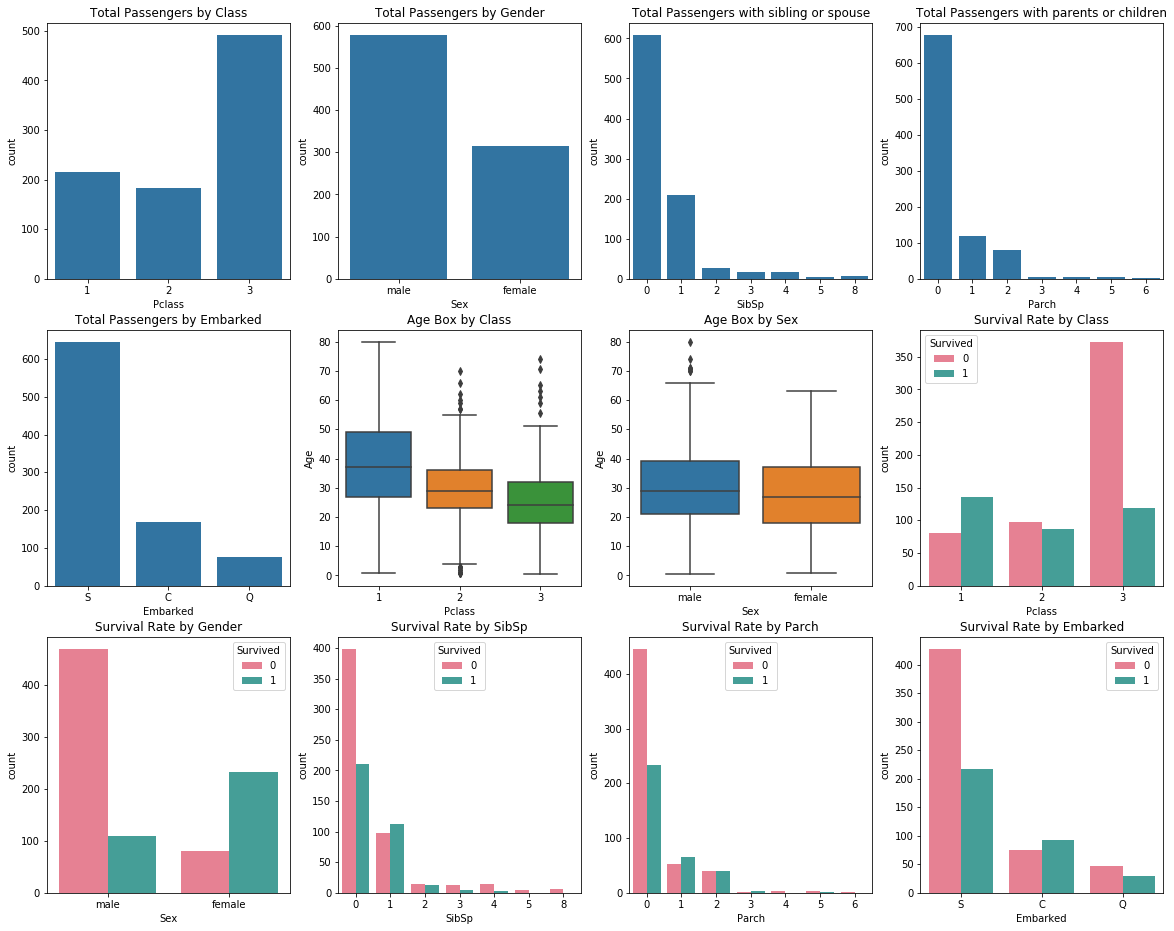

In [7]:
f,ax = plt.subplots(3,4, figsize = (20,16))
base_color = sb.color_palette()[0]
sb.countplot ('Pclass', data = train, ax=ax[0,0], color=base_color)
sb.countplot ('Sex', data = train, ax=ax[0,1], color=base_color)
sb.countplot ('SibSp', data = train, ax=ax[0,2], color=base_color)
sb.countplot ('Parch', data = train, ax=ax[0,3], color=base_color)
sb.countplot ('Embarked', data = train, ax=ax[1,0], color=base_color)
sb.boxplot (x='Pclass', y='Age', data=train, ax=ax[1,1])
sb.boxplot (x='Sex', y='Age', data = train, ax=ax[1,2])

sb.countplot ('Pclass', hue = 'Survived', data=train, ax=ax[1,3],palette='husl')
sb.countplot ('Sex', hue = 'Survived', data=train, ax=ax [2,0],palette='husl')
sb.countplot ('SibSp', hue = 'Survived', data=train, ax=ax [2,1], palette='husl')
sb.countplot ('Parch', hue = 'Survived', data=train, ax=ax [2,2], palette='husl')
sb.countplot ('Embarked', hue = 'Survived', data=train, ax=ax[2,3], palette='husl')

ax[0,0].set_title('Total Passengers by Class')
ax[0,1].set_title('Total Passengers by Gender')
ax[0,2].set_title('Total Passengers with sibling or spouse')
ax[0,3].set_title('Total Passengers with parents or children')
ax[1,0].set_title('Total Passengers by Embarked')
ax[1,1].set_title('Age Box by Class')
ax[1,2].set_title('Age Box by Sex')
ax[1,3].set_title('Survival Rate by Class')
ax[2,0].set_title('Survival Rate by Gender')
ax[2,1].set_title('Survival Rate by SibSp')
ax[2,2].set_title('Survival Rate by Parch')
ax[2,3].set_title('Survival Rate by Embarked')







As I predicted women and upper-class passengers are more likelyly to survive.

People traveling alone weren't more likely to survive, contrary what was expecting. However people travellig with 1-3 parents or children were more likely to survive then those traveling with more than four parents or children.

People with 2-3 siblings/spouses aboard were more likely to survive than those with four or more siblings/spouses aboard


<h1> Data Visualization </h1>



<b> Survived per Gender (Sex) </b>

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


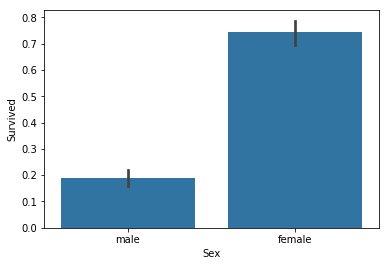

In [8]:
#Print the percentage of female and male who survived
print("Percentage of females who survived:", train['Survived'][train['Sex'] == 'female'].value_counts(normalize = True)[1]*100)
print ("Percentage of males who survived:", train ['Survived'][train ['Sex']== 'male'].value_counts (normalize = True) [1]*100)

#Choosing only one color for the graph
base_color = sb.color_palette()[0]

#Plotting
sb.barplot(data=train, x = 'Sex', y = 'Survived', color = base_color);

74,2% of the women survived the disaster, instead only 18,9% of men survived.

<b> Survived per Pclass </b>

Percentage of Class 1 that survived: 62.96296296296296 %
Percentage of Class 2 that survived: 47.28260869565217 %
Percentage of Class 3 that survived: 24.236252545824847 %


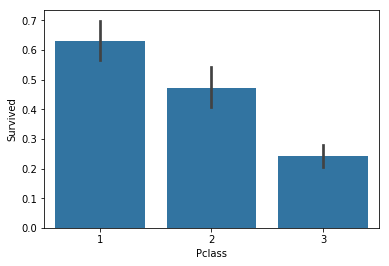

In [9]:
#Calculating the percentage of people by Pclass that survived
print ("Percentage of Class 1 that survived:", train ['Survived'] [train['Pclass']==1].value_counts(normalize = True)[1]*100,"%")
print ("Percentage of Class 2 that survived:", train ['Survived'] [train['Pclass']==2].value_counts(normalize = True)[1]*100,"%")
print ("Percentage of Class 3 that survived:", train ['Survived'] [train['Pclass']==3].value_counts(normalize = True)[1]*100,"%")

#Choosing only one color for the graph
base_color = sb.color_palette()[0]

#Plotting
sb.barplot(data=train, x = 'Pclass', y = 'Survived', color = base_color);


Passengers in first or second class are more likely to survive than passenger in third class”


<b> Survived per Sibling or Spouse (SibSp) </b>

Percentage of SibSp = 0 that survived: 34.53947368421053 %
Percentage of SibSp = 1 that survived: 53.588516746411486 %
Percentage of SibSp = 2 that survived: 46.42857142857143 %
Percentage of SibSp >= 2 that survived: 15.217391304347828 %


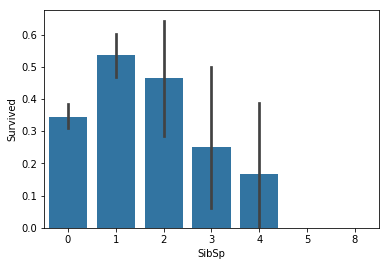

In [10]:
#Calculating the percentage of people by SibSP who survived
print ("Percentage of SibSp = 0 that survived:", train ['Survived'] [train['SibSp']==0].value_counts(normalize = True)[1]*100,"%")
print ("Percentage of SibSp = 1 that survived:", train ['Survived'] [train['SibSp']==1].value_counts(normalize = True)[1]*100,"%")
print ("Percentage of SibSp = 2 that survived:", train ['Survived'] [train['SibSp']==2].value_counts(normalize = True)[1]*100,"%")
print ("Percentage of SibSp >= 2 that survived:", train ['Survived'] [train['SibSp']>=3].value_counts(normalize = True)[1]*100,"%")

#Choosing only one color for the graph
base_color = sb.color_palette()[0]

#Plotting
sb.barplot(data=train, x = 'SibSp', y = 'Survived', color = base_color);


Contrary to the prediction, people traveling alone weren't more likely to survive. However, people traveling with 1-2 siblings or with the spouse were more likely to survive than those traveling with more than 3 siblings or with the spouse.

<b> Survived per Parents or Children (Parch) </b>

Percentage of Parch = 0 that survived: 34.365781710914455 %
Percentage of Parch = 1 that survived: 55.08474576271186 %
Percentage of Parch = 2 that survived: 50.0 %
Percentage of Parch >= 3 that survived: 26.666666666666668 %


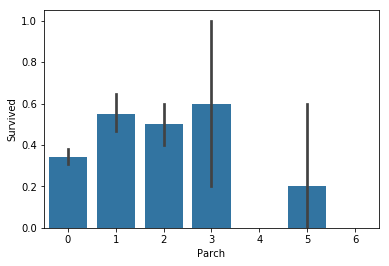

In [11]:
#Calculating the percentage of people by Parch who survived
print ("Percentage of Parch = 0 that survived:", train ['Survived'] [train['Parch']==0].value_counts(normalize = True)[1]*100,"%")
print ("Percentage of Parch = 1 that survived:", train ['Survived'] [train['Parch']==1].value_counts(normalize = True)[1]*100,"%")
print ("Percentage of Parch = 2 that survived:", train ['Survived'] [train['Parch']==2].value_counts(normalize = True)[1]*100,"%")
print ("Percentage of Parch >= 3 that survived:", train ['Survived'] [train['Parch']>=3].value_counts(normalize = True)[1]*100,"%")

#Choosing only one color for the graph
base_color = sb.color_palette()[0]

#Plotting
sb.barplot(data=train, x = 'Parch', y = 'Survived', color = base_color);


People traveling alone weren't more likely to survive, contrary what I was expecting. However, people with 1-3 parents/children aboard were more likely to survive than those with more than four parents/children aboard



<b> Survived per Age </b>

In [12]:
train.describe().Age

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

As we can see above the age of the passenger were between 0 and 80 years old. To make a better analysis we are going to split the feature "Age" in 7 categories, as below:

| Categories | Age |
| :-------------: | :--------: |
| Baby | 0 to 4 years old |
| Child | 5 to 11 years old |
| Teenager | 12 to 17 years old |
| Student | 18 to 23 years old |
| Young Adult | 24 to 34 years old |
| Adult | 35 to 59 years old |
| Senior | 60 to 80 years old |



In [13]:
bin_edges = [0,5,12,18,24,35,60,np.inf]
bin_names = ['Baby', 'Child', 'Teenager', 'student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut (train['Age'], bin_edges, labels = bin_names)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult


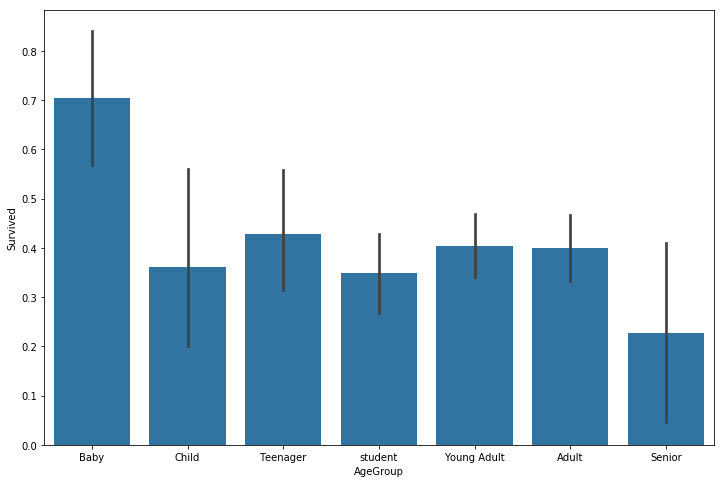

In [14]:
#Graph Size
f = plt.subplots(figsize = (12,8))

#Choosing only one color for the graph
base_color = sb.color_palette()[0]

#plotting
sb.barplot(data=train, x = 'AgeGroup', y = 'Survived', color = base_color);


As we can see young people had a lot more chances to survive the accident.

<h1> Cleaning the Data </h1>


<b> Dropping the columns "Name", "Ticket", "Cabin", "Embarked" and "AgeGroup" </b>

Removing the irrelevant features to make the model more precise.

<b> Column Name: </b> It contains just the name of the passenger, so this information isn't relevant to know if the passenger survived or not

<b> Column Ticket:</b> It contains just the number of the ticket, that is not useful.

<b> Column Cabin:</b> The feature "Cabin" is relevant because it contains information about the class but since the dataset already has the feature "Pclass" there is no need to keep the feature "Cabin".

<b> Column Embarked:</b> Isn't useful.

<b> Column AgeGroup:</b> Created only to group the age.


In [15]:
#removing the variables Name, Ticket and Cabin from the train set
train.drop(['Name', 'Ticket', 'Cabin', 'AgeGroup','Embarked'], axis=1, inplace=True)

#removing the variable Name, Ticket and Cabin from the test set
test.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [16]:
bold('**Columns train data:**')
#Print columns test data
train.columns

**Columns train data:**

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

In [17]:
bold('**Columns test data:**')
#Print columns train data
test.columns

**Columns test data:**

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

<b> One-hot encoding </b>

Replacing the categorical features 'Sex' and 'Embarked' in numeric features.

In [18]:
#create new dataframe train data one-hot enconding
new_data_train = pd.get_dummies(train)

#crete new dataframe test data one-hot encoding
new_data_test = pd.get_dummies(test)

In [19]:
# Display first lines new train data
new_data_train.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,1,0,3,22.0,1,0,7.2500,0,1
1,2,1,1,38.0,1,0,71.2833,1,0
2,3,1,3,26.0,0,0,7.9250,1,0
3,4,1,1,35.0,1,0,53.1000,1,0
4,5,0,3,35.0,0,0,8.0500,0,1


In [20]:
#Display first lines new data set
new_data_test.head(5)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,892,3,34.5,0,0,7.8292,0,1
1,893,3,47.0,1,0,7.0000,1,0
2,894,2,62.0,0,0,9.6875,0,1
3,895,3,27.0,0,0,8.6625,0,1
4,896,3,22.0,1,1,12.2875,1,0


<b> Analyse Null Values </b>

In [21]:
#Quantity of null value in train data
new_data_train.isnull().sum().sort_values(ascending=False).head(5)

Age           177
Sex_male        0
Sex_female      0
Fare            0
Parch           0
dtype: int64

There are 177 null values in 'Age'. I decided to replace these null values with the mean 'Age'.

In [22]:
#Filling null values
new_data_train['Age'].fillna(new_data_train['Age'].mean(), inplace=True)
new_data_test['Age'].fillna(new_data_test['Age'].mean(), inplace=True)

In [23]:
#Quantity of null value in test data
new_data_test.isnull().sum().sort_values(ascending=False).head(5)

Fare          1
Sex_male      0
Sex_female    0
Parch         0
SibSp         0
dtype: int64

There is one null value in 'Fare'. I decided to replace this null value with the mean 'Fare'.

In [24]:
#Filling null values
new_data_test['Fare'].fillna(new_data_test['Fare'].mean(), inplace=True)

<h1> Predictive modelling, cross-validation and hyperparameters </h1>

In [25]:
#X_train (all features for training purposes but excluding Survived)
#y_train (survival result of X-Train) and test are our 3 main datasets for the next sections
X = new_data_train.drop('Survived', axis = 1)
y = new_data_train['Survived']

In [26]:
# Split the data into train and test data
X_train,X_test,y_train,y_test = train_test_split (X,y, test_size = 0.20, random_state=40)

<b> Decision Tree </b>

In [27]:
#Define the model
tree = DecisionTreeClassifier ()

#Fit the model
tree.fit (X_train,y_train)

#Make predictions on the test data
y_pred = tree.predict (X_test)

#Calculate the accuracy
acc_tree = accuracy_score (y_test, y_pred)

#Print accuracy
print('Accuracy Tree is', (acc_tree))

# Calculate the f1_score
train_predictions = tree.predict(X_train)
test_predictions = tree.predict(X_test)
print('The training F1 Score is', f1_score(train_predictions, y_train))
print('The testing F1 Score is', f1_score(test_predictions, y_test))


Accuracy Tree is 0.776536312849162
The training F1 Score is 1.0
The testing F1 Score is 0.7333333333333334


<b> Support Vector Machine </b>

In [28]:
#Define the model
svc = SVC ()

#Fit the model
svc.fit (X_train,y_train)

#Make predictions on the test data
y_pred = svc.predict (X_test)

#Calculate the accuracy
acc_svc = accuracy_score (y_test, y_pred)

#Print accuracy
print('Accuracy SVC is', (acc_svc))

# Calculate the f1_score
train_predictions = svc.predict(X_train)
test_predictions = svc.predict(X_test)
print('The training F1 Score is', f1_score(train_predictions, y_train))
print('The testing F1 Score is', f1_score(test_predictions, y_test))



Accuracy SVC is 0.5698324022346368
The training F1 Score is 0.9962264150943396
The testing F1 Score is 0.07228915662650602


<b> Gradient Boosting </b>

In [29]:
#Define the model
gbc = GradientBoostingClassifier ()

#Fit the model
gbc.fit (X_train,y_train)

#Make predictions on the test data
y_pred = gbc.predict (X_test)


#Calculate the accuracy
acc_gbc = accuracy_score (y_test, y_pred)

train_predictions = gbc.predict(X_train)
test_predictions = gbc.predict(X_test)

#Print accuracy
print('Accuracy GBC is', (acc_gbc))

# Make predictions.
train_predictions = gbc.predict(X_train)
test_predictions = gbc.predict(X_test)
print('The training F1 Score is', f1_score(train_predictions, y_train))
print('The testing F1 Score is', f1_score(test_predictions, y_test))



Accuracy GBC is 0.8603351955307262
The training F1 Score is 0.8772635814889337
The testing F1 Score is 0.8251748251748251


<h1> Grid search to improve the models </h1>


Improving the models to get high score and keep the train and test data close but not too close.

<b> Decision Tree </b>

In [30]:
#Cross Validation Set
cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

#Define the model
tree = DecisionTreeClassifier ()

#parameter list to tune
tree_param_grid = {'max_depth':[1,2,3,4,5,6,7,8,9, 10],'min_samples_leaf':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]}

#Perform grid search
grid_tree = GridSearchCV (tree, tree_param_grid, scoring="accuracy", cv = cv_sets)

#Fit grid search
grid_fit = grid_tree.fit(X_train, y_train)

#Get the estimator
best_tree = grid_tree.best_estimator_

# Fit the new model.
best_tree.fit(X_train, y_train)

# Make predictions using the new model.
best_train_predictions = best_tree.predict(X_train)
best_test_predictions = best_tree.predict(X_test)

# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, y_train))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test))

# Explore what parameters ended up being used in the new model.
best_tree


The training F1 Score is 0.7579365079365079
The testing F1 Score is 0.8082191780821917


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Using GridSearch improved the training and testing F1 Score, which are much closer now.

<b> Support Vector Machine </b>

In [31]:
#Cross Validation Set
cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

#Define the model
svc = SVC()

#parameter list to tune
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1,10,50,100,200,300, 1000]}

#Perform grid search
grid_svc = GridSearchCV (svc, svc_param_grid, scoring="accuracy", cv = cv_sets)

#Fit grid search
grid_fit = grid_svc.fit(X_train, y_train)

#Get the estimator
best_svc = grid_svc.best_estimator_

#Fit the new model
best_svc.fit(X_train, y_train)

# Make predictions using the new model.
best_train_predictions = best_svc.predict(X_train)
best_test_predictions = best_svc.predict(X_test)

# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, y_train))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test))

# Explore what parameters ended up being used in the new model.
best_svc


The training F1 Score is 0.8752475247524751
The testing F1 Score is 0.47407407407407404


SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Using GridSearch improved the training and testing F1 Score, which are closer now, but the testing F1 score is still low.

<b> Gradient Boosting </b>

In [32]:
#Cross Validation Set
cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

GBC = GradientBoostingClassifier()

#parameter list to tune
gbc_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [300,400,500],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [1,2,3,4,5,6,7,8,9,10],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] }

#Perform grid search
grid_GBC = GridSearchCV (GBC, gbc_param_grid, scoring="accuracy", cv = cv_sets)

#Fit grid search
grid_fit = grid_GBC.fit(X_train, y_train)

# Get the estimator.
best_GBC = grid_GBC.best_estimator_

# Fit the new model.
best_GBC.fit(X_train, y_train)

# Make predictions using the new model.
best_train_predictions = best_GBC.predict(X_train)
best_test_predictions = best_GBC.predict(X_test)

# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, y_train))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test))

# Explore what parameters ended up being used in the new model.
best_GBC


The training F1 Score is 0.8131416837782341
The testing F1 Score is 0.8275862068965517


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features=0.3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=100, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

Using Grid Search improved the training and testing F1 Score, which are much more close
now, from the tree models tested the Gradient Boosting had the best results.

<h1> Submission </h1>

In [33]:
submission2 = pd.DataFrame()
submission2 ['PassengerId'] = new_data_test ['PassengerId']
submission2 ['Survived'] = best_GBC.predict (new_data_test)

In [34]:
submission2.to_csv('submission2.csv',index=False)